In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
import os
from scipy import stats
import matplotlib.pyplot as plt
from matplotlib import gridspec
import seaborn as sns
sns.set(style="white")
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})

:0: FutureWarning: IPython widgets are experimental and may change in the future.


In [3]:
data_path = 'data/'
infiles = [item for item in os.listdir(data_path) if item.endswith('txt')]

In [4]:
#since s020 stopped and restarted, there were two files, which have already been combined in 's020_output_0.txt'
infiles = [item for item in infiles if item != 's020_output_2.txt'] 

In [5]:
columns = ['trial_num','cue_type','target_identity','target_category','choices','target_presence',
           'response','response_correct','response_time','total_trial_time',
           'precue_value','IDUNNOpre1','IDUNNOpre2','precue_time','precue_time_actual','precue_position',
           'picture1_value','IDUNNO1','picture1_stim','picture1_time','picture1_time_actual', 'picture1_posititon',
           'picture2_value','IDUNNO2','picture2_stim','picture2_time','picture2_time_actual', 'picture2_posititon',
           'picture3_value','IDUNNO3','picture3_stim','picture3_time','picture3_time_actual', 'picture3_posititon',
           'picture4_value','IDUNNO4','picture4_stim','picture4_time','picture4_time_actual', 'picture4_posititon',
           'picture5_value','IDUNNO5','picture5_stim','picture5_time','picture5_time_actual', 'picture5_posititon',
           'picture6_value','IDUNNO6','picture6_stim','picture6_time','picture6_time_actual', 'picture6_posititon',
            'postcue_value','IDUNNOpost1','IDUNNOpost2','postcue_time','postcue_time_actual','postcue_position']
           

In [6]:
df_all = []
for infile in infiles:
    subject =  infile[:4]
    if subject not in  ['s002','s008','s019']: #s002 is ok, just not the same format
        df = pd.read_csv(data_path+infile, sep="\t", header = None)
        df.columns = columns
        df['subject'] = subject
        df_all.append(df)
    elif subject == 's002':
        df2 = pd.read_csv(data_path+infile, sep="\t")
        df2['subject'] = subject
        
df2.columns = columns+['subject']
df_all.append(df2)



In [7]:
result = pd.concat(df_all)

In [8]:
result = result.reset_index(drop=True)

In [9]:
result.target_identity.unique()

array(['chair', 'False', 'car', 'desert', 'bathroom', 'flower', 'shoe',
       'coast', 'woods', "('shoe', 'desert')", "('bathroom', 'car')",
       "('desert', 'car')", "('flower', 'coast')", "('coast', 'shoe')",
       "('car', 'woods')", "('coast', 'flower')", "('car', 'desert')",
       "('chair', 'woods')", "('coast', 'car')", "('woods', 'chair')",
       "('shoe', 'bathroom')", "('desert', 'flower')",
       "('flower', 'woods')", "('bathroom', 'chair')",
       "('flower', 'bathroom')", "('car', 'bathroom')",
       "('coast', 'chair')", "('chair', 'desert')", "('woods', 'shoe')",
       "('bathroom', 'flower')", "('flower', 'desert')",
       "('woods', 'flower')", "('bathroom', 'shoe')", "('woods', 'car')",
       "('shoe', 'coast')", "('chair', 'bathroom')", "('desert', 'chair')",
       "('chair', 'coast')", "('car', 'coast')", "('shoe', 'woods')",
       "('desert', 'shoe')", 'FALSE'], dtype=object)

In [55]:
h= result.groupby(['subject','cue_type'])['response_correct'].mean().reset_index()

In [57]:
h[h.cue_type == 'precue']

,subject,cue_type,response_correct
3,s002,precue,0.846154
7,s003,precue,0.818841
11,s004,precue,0.763158
15,s005,precue,0.754491
19,s006,precue,0.864583
23,s007,precue,0.770833
27,s009,precue,0.703125
31,s010,precue,0.843750
35,s011,precue,0.807292
39,s012,precue,0.828125


In [16]:
subject_list = ['sub002','sub003','sub004','sub005','sub006','sub007','sub009','sub010','sub011','sub012','sub013',
                'sub014','sub015','sub016','sub017','sub018','sub020','sub021','sub022','sub023','sub024','sub025',
               'sub026','sub028']
#subject_list = ['sub004','sub005','sub007','sub009','sub010','sub011','sub012','sub013','sub016']

In [17]:
len(subject_list)

24

In [18]:
ext = '_balanced'

In [20]:
array_list_correct = []
array_list_incorrect = []
subjects_used =[]
for subject in subject_list:
    try:
        d = np.load('classification_output/'+subject+'_precue_vs_nocue_response_correct'+ext+'.npy')
        array_list_correct.append(d)#stats.zscore(d))
        d = np.load('classification_output/'+subject+'_precue_vs_nocue_response_incorrect'+ext+'.npy')
        array_list_incorrect.append(d)#stats.zscore(d))
        subjects_used.append(subject[0]+subject[-3:])
    except IOError:
        print subject,"missing file"

sub006 missing file


In [21]:
a_correct = np.average(array_list_correct, axis=0)
err_correct = stats.sem(array_list_correct, axis=0)
a_incorrect = np.average(array_list_incorrect, axis=0)
err_incorrect = stats.sem(array_list_incorrect, axis=0)

#a_correct = stats.zscore(a_correct)
#a_incorrect = stats.zscore(a_incorrect)

<Container object of 3 artists>

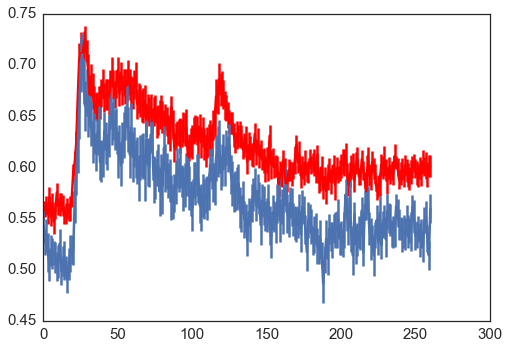

In [22]:
y_correct = a_correct.diagonal()
y_incorrect = a_incorrect.diagonal()

plt.figure()
plt.errorbar(x=np.array(range(len(a_correct.diagonal()))),y=y_correct, yerr=err_correct.diagonal(),color='red')
plt.errorbar(x=np.array(range(len(a_incorrect.diagonal()))),y=y_incorrect, yerr=err_incorrect.diagonal())




In [23]:
before = 2
after = 2
correct = np.array([item.diagonal()[item.diagonal().argmax()-before:item.diagonal().argmax()+after].mean() for item in array_list_correct])
incorrect = np.array([item.diagonal()[item.diagonal().argmax()-before:item.diagonal().argmax()+after].mean() for item in array_list_incorrect])

#don't take mean over the before to after interval
correct_interval = np.array([item.diagonal()[item.diagonal().argmax()-before:item.diagonal().argmax()+after] for item in array_list_correct])
incorrect_interval = np.array([item.diagonal()[item.diagonal().argmax()-before:item.diagonal().argmax()+after] for item in array_list_incorrect])


#when done for best timepoint across subjects
correct = np.array([item.diagonal()[y_correct.argmax()-before:y_correct.argmax()+after].mean() for item in array_list_correct])
incorrect = np.array([item.diagonal()[y_incorrect.argmax()-before:y_incorrect.argmax()+after].mean() for item in array_list_incorrect])

#don't take mean over the before to after interval
correct_interval = np.array([item.diagonal()[y_correct.argmax()-before:y_correct.argmax()+after] for item in array_list_correct])
incorrect_interval = np.array([item.diagonal()[y_incorrect.argmax()-before:y_incorrect.argmax()+after] for item in array_list_incorrect])


#when done for best timepoint across subjects, restricting it to specific range
correct = np.array([item.diagonal()[y_correct[0:50].argmax()-before:y_correct[0:50].argmax()+after].mean() for item in array_list_correct])
incorrect = np.array([item.diagonal()[y_incorrect[0:50].argmax()-before:y_incorrect[0:50].argmax()+after].mean() for item in array_list_incorrect])

#don't take mean over the before to after interval
correct_interval = np.array([item.diagonal()[y_correct[0:50].argmax()-before:y_correct[0:50].argmax()+after] for item in array_list_correct])
incorrect_interval = np.array([item.diagonal()[y_incorrect[0:50].argmax()-before:y_incorrect[0:50].argmax()+after] for item in array_list_incorrect])





In [24]:
y_incorrect[0:50].argmax()

26

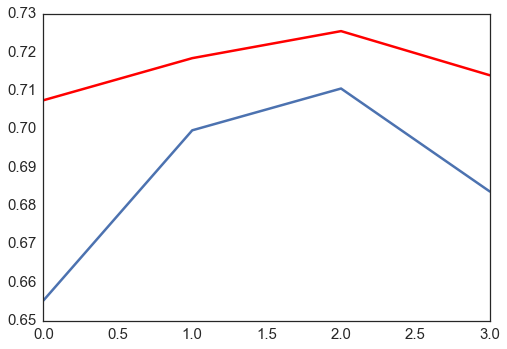

In [25]:
plt.plot(np.mean(correct_interval,axis=0),color='red')
plt.plot(np.mean(incorrect_interval,axis=0))

In [26]:
for item in correct: print item

0.722434826203
0.654308712121
0.673513513514
0.638419117647
0.693226600985
0.704990516833
0.761038961039
0.775609080842
0.766927990708
0.751391027199
0.758890824623
0.804054666264
0.749908536585
0.621357098186
0.787340301974
0.621417112299
0.729642857143
0.627584670232
0.712936552954
0.674448380567
0.639015939016
0.800352564103
0.807631578947


In [27]:
stats.ttest_rel(correct,incorrect)

Ttest_relResult(statistic=2.3565454984877601, pvalue=0.027764425516059565)

In [28]:
tmp = h[(h.subject.isin(subjects_used)) & (h.cue_type == 'precue')]['response_correct']

In [29]:
np.corrcoef(correct-incorrect, tmp)

array([[ 1.        , -0.24030683],
       [-0.24030683,  1.        ]])

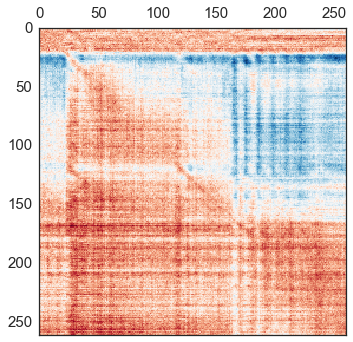

In [30]:
p = plt.matshow(a_correct-a_incorrect,cmap='RdBu_r')
#p.set_clim(vmin=.5, vmax=None)

In [61]:
array_list_correct = []
array_list_incorrect = []


array_list = []
for subject in subject_list:
    try:
        d = np.load('classification_output/'+subject+'_postcue_vs_nocue_response_correct'+ext+'.npy')
        array_list_correct.append(d)#stats.zscore(d))
        d = np.load('classification_output/'+subject+'_postcue_vs_nocue_response_incorrect'+ext+'.npy')
        array_list_incorrect.append(d)#stats.zscore(d))
    except IOError:
        print subject,"missing file"

sub006 missing file
sub010 missing file


In [62]:
a_correct = np.average(array_list_correct, axis=0)
err_correct = stats.sem(array_list_correct, axis=0)
a_incorrect = np.average(array_list_incorrect, axis=0)
err_incorrect = stats.sem(array_list_incorrect, axis=0)

#a_correct = stats.zscore(a_correct)
#a_incorrect = stats.zscore(a_incorrect)

<Container object of 3 artists>

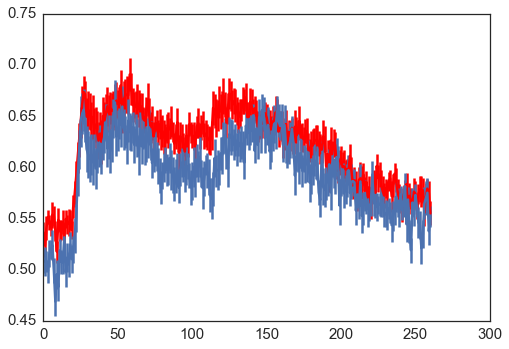

In [63]:
y_correct = a_correct.diagonal()
y_incorrect = a_incorrect.diagonal()

plt.figure()
plt.errorbar(x=np.array(range(len(a_correct.diagonal()))),y=y_correct, yerr=err_correct.diagonal(),color='red')
plt.errorbar(x=np.array(range(len(a_incorrect.diagonal()))),y=y_incorrect, yerr=err_incorrect.diagonal())




In [64]:
before = 4
after = 4
correct = np.array([item.diagonal()[item.diagonal().argmax()-before:item.diagonal().argmax()+after].mean() for item in array_list_correct])
incorrect = np.array([item.diagonal()[item.diagonal().argmax()-before:item.diagonal().argmax()+after].mean() for item in array_list_incorrect])

#don't take mean over the before to after interval
correct_interval = np.array([item.diagonal()[item.diagonal().argmax()-before:item.diagonal().argmax()+after] for item in array_list_correct])
incorrect_interval = np.array([item.diagonal()[item.diagonal().argmax()-before:item.diagonal().argmax()+after] for item in array_list_incorrect])


#when done for best timepoint across subjects
correct = np.array([item.diagonal()[y_correct.argmax()-before:y_correct.argmax()+after].mean() for item in array_list_correct])
incorrect = np.array([item.diagonal()[y_incorrect.argmax()-before:y_incorrect.argmax()+after].mean() for item in array_list_incorrect])

#don't take mean over the before to after interval
correct_interval = np.array([item.diagonal()[y_correct.argmax()-before:y_correct.argmax()+after] for item in array_list_correct])
incorrect_interval = np.array([item.diagonal()[y_incorrect.argmax()-before:y_incorrect.argmax()+after] for item in array_list_incorrect])


#when done for best timepoint across subjects, restricting it to specific range
correct = np.array([item.diagonal()[y_correct[0:50].argmax()-before:y_correct[0:50].argmax()+after].mean() for item in array_list_correct])
incorrect = np.array([item.diagonal()[y_incorrect[0:50].argmax()-before:y_incorrect[0:50].argmax()+after].mean() for item in array_list_incorrect])

#don't take mean over the before to after interval
correct_interval = np.array([item.diagonal()[y_correct[0:50].argmax()-before:y_correct[0:50].argmax()+after] for item in array_list_correct])
incorrect_interval = np.array([item.diagonal()[y_incorrect[0:50].argmax()-before:y_incorrect[0:50].argmax()+after] for item in array_list_incorrect])






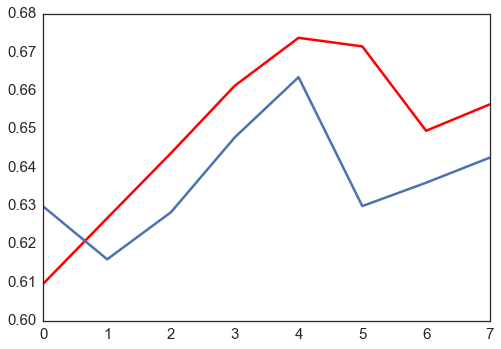

In [65]:
plt.plot(np.mean(correct_interval,axis=0),color='red')
plt.plot(np.mean(incorrect_interval,axis=0))

In [66]:
stats.ttest_rel(correct,incorrect)

Ttest_relResult(statistic=1.0599120876310597, pvalue=0.30122379991084602)

In [37]:
array_list_correct = []
array_list_incorrect = []

subjects_used = []
for subject in [item for item in subject_list if item !='sub006']:
    try:
        #d = np.load('classification_output/'+subject+'_target_identity_correct.npy')
        #array_list_correct.append(d)
        d = np.load('classification_output/'+subject+'_target_identity_response_correct'+ext+'.npy')
        array_list_correct.append(d)#stats.zscore(d))
        d = np.load('classification_output/'+subject+'_target_identity_response_incorrect'+ext+'.npy')
        array_list_incorrect.append(d)#stats.zscore(d))
        subjects_used.append(subject[0]+subject[-3:])
    except IOError:
        print subject,"missing file"
    

In [38]:
a_correct = np.average(array_list_correct, axis=0)
err_correct = stats.sem(array_list_correct, axis=0)
a_incorrect = np.average(array_list_incorrect, axis=0)
err_incorrect = stats.sem(array_list_incorrect, axis=0)

#a_correct = stats.zscore(a_correct)
#a_incorrect = stats.zscore(a_incorrect)

<Container object of 3 artists>

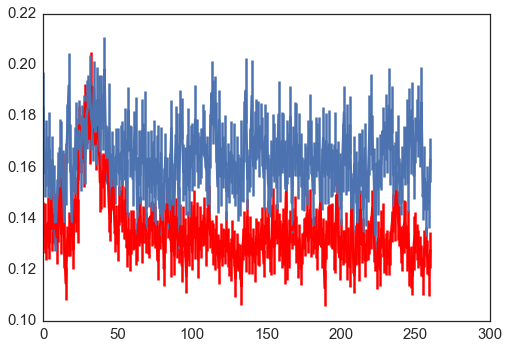

In [39]:
y_correct = a_correct.diagonal()
y_incorrect = a_incorrect.diagonal()

plt.figure()
plt.errorbar(x=np.array(range(len(a_correct.diagonal()))),y=y_correct, yerr=err_correct.diagonal(),color='red')
plt.errorbar(x=np.array(range(len(a_incorrect.diagonal()))),y=y_incorrect, yerr=err_incorrect.diagonal())





In [40]:
before = 2
after = 2
correct = np.array([item.diagonal()[item.diagonal().argmax()-before:item.diagonal().argmax()+after].mean() for item in array_list_correct])
incorrect = np.array([item.diagonal()[item.diagonal().argmax()-before:item.diagonal().argmax()+after].mean() for item in array_list_incorrect])

#don't take mean over the before to after interval
correct_interval = np.array([item.diagonal()[item.diagonal().argmax()-before:item.diagonal().argmax()+after] for item in array_list_correct])
incorrect_interval = np.array([item.diagonal()[item.diagonal().argmax()-before:item.diagonal().argmax()+after] for item in array_list_incorrect])


#when done for best timepoint across subjects
correct = np.array([item.diagonal()[y_correct.argmax()-before:y_correct.argmax()+after].mean() for item in array_list_correct])
incorrect = np.array([item.diagonal()[y_incorrect.argmax()-before:y_incorrect.argmax()+after].mean() for item in array_list_incorrect])

#don't take mean over the before to after interval
correct_interval = np.array([item.diagonal()[y_correct.argmax()-before:y_correct.argmax()+after] for item in array_list_correct])
incorrect_interval = np.array([item.diagonal()[y_incorrect.argmax()-before:y_incorrect.argmax()+after] for item in array_list_incorrect])


#when done for best timepoint across subjects, restricting it to specific range
correct = np.array([item.diagonal()[y_correct[0:50].argmax()-before:y_correct[0:50].argmax()+after].mean() for item in array_list_correct])
incorrect = np.array([item.diagonal()[y_incorrect[0:50].argmax()-before:y_incorrect[0:50].argmax()+after].mean() for item in array_list_incorrect])

#don't take mean over the before to after interval
correct_interval = np.array([item.diagonal()[y_correct[0:50].argmax()-before:y_correct[0:50].argmax()+after] for item in array_list_correct])
incorrect_interval = np.array([item.diagonal()[y_incorrect[0:50].argmax()-before:y_incorrect[0:50].argmax()+after] for item in array_list_incorrect])







/home/predatt/emiwar/local/lib/python2.7/site-packages/numpy/core/_methods.py:59: RuntimeWarning: Mean of empty slice.
  warnings.warn("Mean of empty slice.", RuntimeWarning)


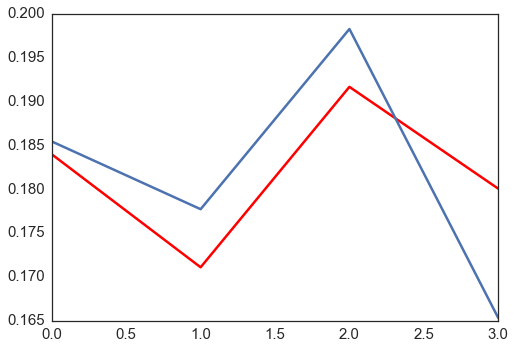

In [41]:
plt.plot(np.mean(correct_interval,axis=0),color='red')
plt.plot(np.mean(incorrect_interval,axis=0))

In [42]:
stats.ttest_rel(correct,incorrect)

Ttest_relResult(statistic=0.0010281678234542626, pvalue=0.999188907247752)

In [43]:
for item in correct: print item

0.141
0.191332735247
0.164633022774
0.094285192147
0.211393374741
0.232145190093
0.214423400673
0.24759805412
0.15831959707
0.212850860894
0.177939262207
0.198546947005
0.260737245846
0.149713330148
0.208633025659
0.105237232574
0.226555023923
0.175152173913
0.11792998668
0.183343397746
0.133447368421
0.186368914902
0.187721861472


In [44]:
h = result.groupby(['subject','target_presence'])['response_correct'].mean().reset_index()

In [45]:
tmp = h[(h.subject.isin(subjects_used)) & (h.target_presence == 'present') ]['response_correct']

In [46]:
tmp

2     0.729560
5     0.521127
8     0.643979
11    0.573171
17    0.666667
20    0.625000
23    0.625000
26    0.630208
29    0.619792
32    0.609375
35    0.770833
38    0.765625
41    0.562500
44    0.598958
47    0.682292
50    0.733728
53    0.479167
56    0.630208
59    0.630208
62    0.703125
65    0.536458
68    0.583333
74    0.505208
Name: response_correct, dtype: float64

In [47]:
np.corrcoef(correct-incorrect, tmp)

array([[ 1.        , -0.33395464],
       [-0.33395464,  1.        ]])

In [48]:
precue_array_list_correct = []
precue_array_list_incorrect =[]
subjects_used=[]
for subject in subject_list:
    try:

        
        d = np.load('classification_output/'+subject+'_noprecue_target_id_response_incorrect'+ext+'.npy')
        precue_array_list_incorrect.append(d)#stats.zscore(d))
        
        d = np.load('classification_output/'+subject+'_noprecue_target_id_response_correct'+ext+'.npy')
        precue_array_list_correct.append(d)#stats.zscore(d))
        subjects_used.append(subject[0]+subject[-3:])
    except IOError:
        print subject, "does not have this file"
#     try:
#         d = np.load('classification_output/'+subject+'_precue_target_id_response_incorrect.npy')
#         precue_array_list_incorrect.append(stats.zscore(d))
#     except IOError:
#         print subject, "does not have this file"
            

In [49]:
before = 2
after = 2
correct = np.array([item.diagonal()[item.diagonal().argmax()-before:item.diagonal().argmax()+after].mean() for item in precue_array_list_correct])
incorrect = np.array([item.diagonal()[item.diagonal().argmax()-before:item.diagonal().argmax()+after].mean() for item in precue_array_list_incorrect])

#don't take mean over the before to after interval
correct_interval = np.array([item.diagonal()[item.diagonal().argmax()-before:item.diagonal().argmax()+after] for item in precue_array_list_correct])
incorrect_interval = np.array([item.diagonal()[item.diagonal().argmax()-before:item.diagonal().argmax()+after] for item in precue_array_list_incorrect])


#when done for best timepoint across subjects
correct = np.array([item.diagonal()[y_correct.argmax()-before:y_correct.argmax()+after].mean() for item in precue_array_list_correct])
incorrect = np.array([item.diagonal()[y_incorrect.argmax()-before:y_incorrect.argmax()+after].mean() for item in precue_array_list_incorrect])

#don't take mean over the before to after interval
correct_interval = np.array([item.diagonal()[y_correct.argmax()-before:y_correct.argmax()+after] for item in precue_array_list_correct])
incorrect_interval = np.array([item.diagonal()[y_incorrect.argmax()-before:y_incorrect.argmax()+after] for item in precue_array_list_incorrect])


#when done for best timepoint across subjects, restricting it to specific range
correct = np.array([item.diagonal()[y_correct[0:50].argmax()-before:y_correct[0:50].argmax()+after].mean() for item in precue_array_list_correct])
incorrect = np.array([item.diagonal()[y_incorrect[0:50].argmax()-before:y_incorrect[0:50].argmax()+after].mean() for item in precue_array_list_incorrect])

#don't take mean over the before to after interval
correct_interval = np.array([item.diagonal()[y_correct[0:50].argmax()-before:y_correct[0:50].argmax()+after] for item in precue_array_list_correct])
incorrect_interval = np.array([item.diagonal()[y_incorrect[0:50].argmax()-before:y_incorrect[0:50].argmax()+after] for item in precue_array_list_incorrect])





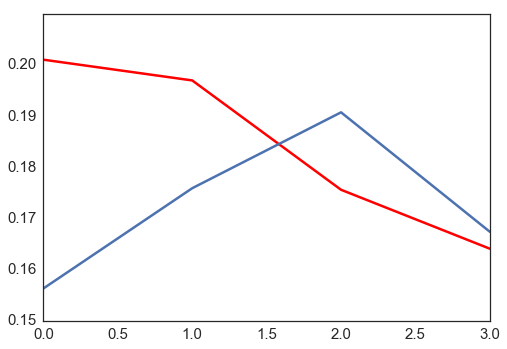

In [50]:
plt.plot(np.mean(correct_interval,axis=0),color='red')
plt.plot(np.mean(incorrect_interval,axis=0))

In [51]:
print len(incorrect),len(correct)

24 24


In [52]:
stats.ttest_rel(correct,incorrect)

Ttest_relResult(statistic=0.69958884238634345, pvalue=0.49119971154505526)

In [53]:
precue_pic1_array_list = []
precue_pic2_array_list = []
precue_pic3_array_list = []
precue_pic4_array_list = []
precue_pic5_array_list = []
precue_pic6_array_list = []

precue_pic1_array_list_incorrect = []
precue_pic2_array_list_incorrect = []
precue_pic3_array_list_incorrect = []
precue_pic4_array_list_incorrect = []
precue_pic5_array_list_incorrect = []
precue_pic6_array_list_incorrect = []


for subject in [item for item in subject_list if item != 'sub002']:
    try:
        d = np.load('classification_output/'+subject+'_precue_picture1_response_correct'+ext+'.npy')
        precue_pic1_array_list.append(d)
    except IOError: #sub010 has no first image
        pass

    d = np.load('classification_output/'+subject+'_precue_picture2_response_correct'+ext+'.npy')
    precue_pic2_array_list.append(d)
    d = np.load('classification_output/'+subject+'_precue_picture3_response_correct'+ext+'.npy')
    precue_pic3_array_list.append(d)
    d = np.load('classification_output/'+subject+'_precue_picture4_response_correct'+ext+'.npy')
    precue_pic4_array_list.append(d)
    
    d = np.load('classification_output/'+subject+'_precue_picture5_response_correct'+ext+'.npy')
    precue_pic5_array_list.append(d)
    d = np.load('classification_output/'+subject+'_precue_picture6_response_correct'+ext+'.npy')
    precue_pic6_array_list.append(d)
    
    
    try:
        d = np.load('classification_output/'+subject+'_precue_picture1_response_incorrect'+ext+'.npy')
        precue_pic1_array_list_incorrect.append(d)
    except IOError: #sub010 has no first image
        pass

    d = np.load('classification_output/'+subject+'_precue_picture2_response_incorrect'+ext+'.npy')
    precue_pic2_array_list_incorrect.append(d)
    d = np.load('classification_output/'+subject+'_precue_picture3_response_incorrect'+ext+'.npy')
    precue_pic3_array_list_incorrect.append(d)
    d = np.load('classification_output/'+subject+'_precue_picture4_response_incorrect'+ext+'.npy')
    precue_pic4_array_list_incorrect.append(d)
    d = np.load('classification_output/'+subject+'_precue_picture5_response_incorrect'+ext+'.npy')
    precue_pic5_array_list_incorrect.append(d)
    d = np.load('classification_output/'+subject+'_precue_picture6_response_incorrect'+ext+'.npy')
    precue_pic6_array_list_incorrect.append(d)

IOError: [Errno 2] No such file or directory: 'classification_output/sub003_precue_picture3_response_incorrect_balanced.npy'